# Figure 7.9

The PI to PD effective radiative forcing bar chart

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from netCDF4 import Dataset
import warnings

In [2]:
pl.rcParams['figure.figsize'] = (18/2.54, 10/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
AR6_forcing = pd.read_csv('../data_output/AR6_ERF_1750-2019.csv', index_col=0)
AR6_forcing_p05 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc05.csv', index_col=0)
AR6_forcing_p95 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc95.csv', index_col=0)

In [4]:
target_year = 2019
aerosol_years = slice(2005,2014)    # for some reason pandas slices do include end year
AR6_forcing.loc[target_year,:]

co2                               2.148858
ch4                               0.547169
n2o                               0.208816
other_wmghg                       0.408009
o3                                0.439267
h2o_stratospheric                 0.050000
contrails                         0.057535
aerosol-radiation_interactions   -0.215562
aerosol-cloud_interactions       -0.843623
bc_on_snow                        0.080000
land_use                         -0.200000
volcanic                          0.139917
solar                            -0.022173
nonco2_wmghg                      1.163995
aerosol                          -1.059185
chapter2_other_anthro            -0.012465
total_anthropogenic               2.680470
total_natural                     0.117744
total                             2.798214
Name: 2019, dtype: float64

In [6]:
unc = {}
for agent in ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric', 'contrails',
             'aerosol', 'bc_on_snow', 'land_use', 'volcanic', 'solar', 'total_anthropogenic', 'nonco2_wmghg', 'o3']:
    unc[agent] = np.array([
        AR6_forcing.loc[target_year,agent]-AR6_forcing_p05.loc[target_year,agent],
        AR6_forcing_p95.loc[target_year,agent]-AR6_forcing.loc[target_year,agent]]).reshape((2,1))
# unc['aerosol'] = np.array([
#     AR6_forcing.loc[aerosol_years,'aerosol'].mean()-AR6_forcing_p05.loc[aerosol_years,'aerosol'].mean(),
#     AR6_forcing_p95.loc[aerosol_years,'aerosol'].mean()-AR6_forcing.loc[aerosol_years,'aerosol'].mean()]).reshape((2,1))

In [7]:
unc['nonco2_wmghg']

array([[0.13947122],
       [0.13462391]])

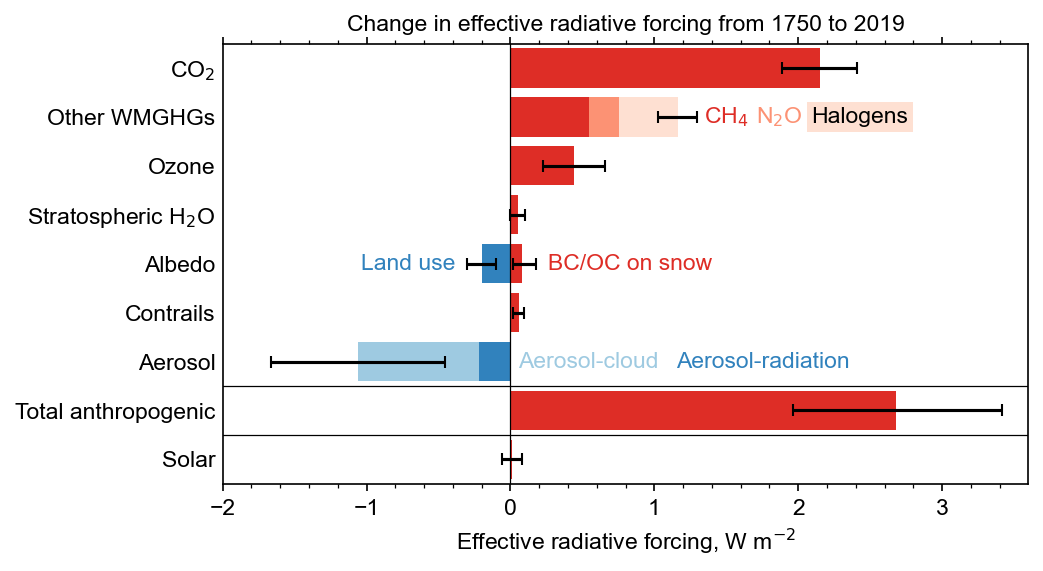

In [10]:
fig, ax = pl.subplots()

hot = ['#de2d26','#fc9274','#fee0d2']
cool=['#3182bd','#9ecae1']

ax.barh(0, AR6_forcing.loc[target_year,'co2'], color=hot[0], xerr=unc['co2'], capsize=3)
ax.barh(-1, AR6_forcing.loc[target_year,'ch4'], color=hot[0])
ax.barh(-1, AR6_forcing.loc[target_year,'n2o'], color=hot[1], left=AR6_forcing.loc[target_year,'ch4'])
ax.barh(-1, AR6_forcing.loc[target_year,'other_wmghg'], color=hot[2], left=AR6_forcing.loc[target_year,'ch4']+AR6_forcing.loc[target_year,'n2o'], xerr=unc['nonco2_wmghg'], capsize=3)
ax.barh(-2, AR6_forcing.loc[target_year,'o3'], xerr=unc['o3'], color=hot[0], capsize=3)
ax.barh(-3, AR6_forcing.loc[target_year,'h2o_stratospheric'], color=hot[0], xerr=unc['h2o_stratospheric'], capsize=3)
ax.barh(-4, AR6_forcing.loc[target_year,'land_use'], color=cool[0], xerr=unc['land_use'], capsize=3)
ax.barh(-4, AR6_forcing.loc[target_year,'bc_on_snow'], color=hot[0], xerr=unc['bc_on_snow'], capsize=3)
ax.barh(-5, AR6_forcing.loc[target_year,'contrails'], color=hot[0], xerr=unc['contrails'], capsize=3)
ax.barh(-6, AR6_forcing.loc[target_year,'aerosol-radiation_interactions'], color=cool[0])
ax.barh(-6, AR6_forcing.loc[target_year,'aerosol-cloud_interactions'], color=cool[1], left=AR6_forcing.loc[target_year,'aerosol-radiation_interactions'], xerr=unc['aerosol'], capsize=3)
ax.barh(-7, AR6_forcing.loc[target_year,'total_anthropogenic'], color=hot[0], xerr=unc['total_anthropogenic'], capsize=3)
ax.barh(-8, +0.01, color=hot[0], xerr=0.07, capsize=3)

ax.text(1.5, -1, 'CH$_4$',ha='center',va='center', color=hot[0])
ax.text(1.87, -1,'N$_2$O',ha='center',va='center', color=hot[1])
ax.text(2.09, -1, 'Halogens', va='center', color='k', bbox=dict(facecolor=hot[2], boxstyle='square,pad=0.2', lw=0))
ax.text(-0.38,-4, 'Land use', va='center', ha='right', color=cool[0])
ax.text(0.26, -4, 'BC/OC on snow', va='center', ha='left', color=hot[0])
ax.text(0.05, -6, 'Aerosol-cloud', va='center', ha='left', color=cool[1])
ax.text(1.15, -6, 'Aerosol-radiation', va='center', ha='left', color=cool[0])

ax.set_ylim(-8.5,0.5)
ax.set_xlim(-2.,3.6)
ax.axvline(0, color='k', lw=0.6)
ax.axhline(-6.5, color='k', lw=0.6)
ax.axhline(-7.5, color='k', lw=0.6)
ax.set_yticks(np.arange(-8,1));
ax.set_xticks(np.arange(-2,3.2,1));
ax.set_xlabel('Effective radiative forcing, W m$^{-2}$')
ax.set_title('')
ax.set_yticklabels(['CO$_2$','Other WMGHGs','Ozone','Stratospheric H$_2$O', 'Albedo', 'Contrails', 'Aerosol','Total anthropogenic', 'Solar'][::-1]);
ax.set_title('Change in effective radiative forcing from 1750 to %d' % target_year, size=11)

# Create the figure
pl.tight_layout()
pl.savefig('../figures/fig7.9.png')
pl.savefig('../figures/fig7.9.pdf')